# Importing necessary modules
### Note:Change paths wherever necessary

This ipynb file is in this folder
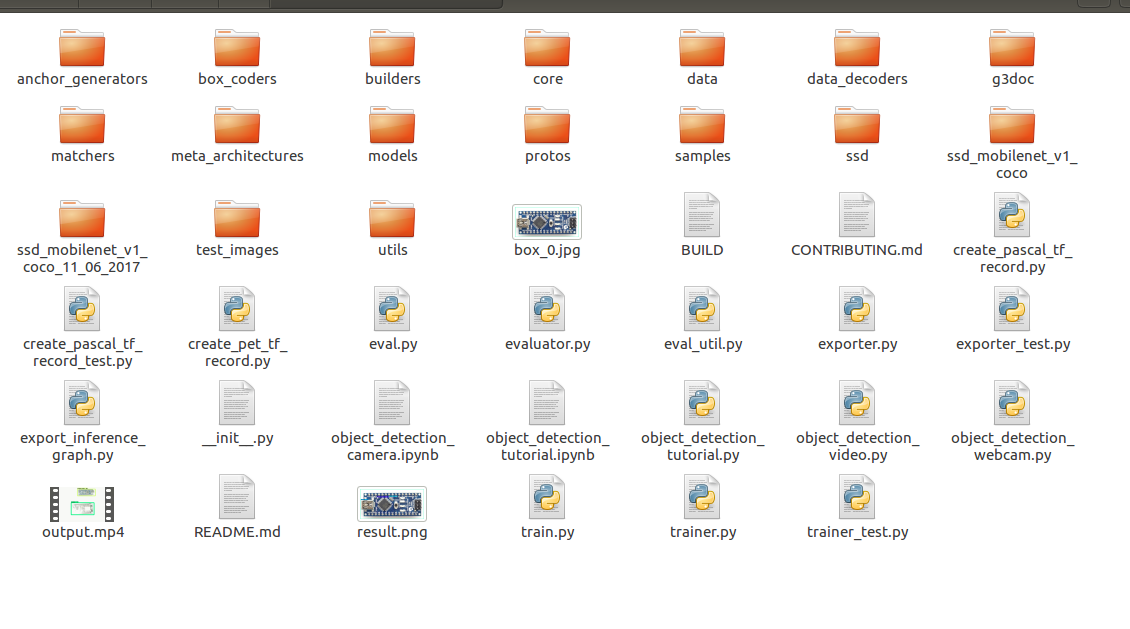

In [12]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util
tf.gfile = tf.io.gfile
# Name of the directory containing the object detection module we're using
#MODEL_NAME = 'ssd_mobilenet_v1_coco'
MODEL_NAME = 'ssd_mobilenet_v1_coco'
MODEL_NAME = 'microcontroller_object_detection_model'
VIDEO_NAME = 'ObjectDetection.mp4'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')
# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'data','object-detection.pbtxt')
# Path to video
PATH_TO_VIDEO = os.path.join(CWD_PATH,'test_images',VIDEO_NAME)
# Number of classes the object detector can identify
NUM_CLASSES = 4

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.compat.v2.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.compat.v1.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Uncomment to see output of video recording

In [13]:
# out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'),20.0,(640,352))

# video = cv2.VideoCapture(PATH_TO_VIDEO)

# while(video.isOpened()):

#     # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
#     # i.e. a single-column array, where each item in the column has the pixel RGB value
#     ret, frame = video.read()
#     if ret==True:
#         frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         frame_expanded = np.expand_dims(frame_rgb, axis=0)
    
#         # Perform the actual detection by running the model with the image as input
#         (boxes, scores, classes, num) = sess.run(
#             [detection_boxes, detection_scores, detection_classes, num_detections],
#             feed_dict={image_tensor: frame_expanded})
        
#         # Draw the results of the detection (aka 'visulaize the results')
#         vis_util.visualize_boxes_and_labels_on_image_array(
#             frame,
#             np.squeeze(boxes),
#             np.squeeze(classes).astype(np.int32),
#             np.squeeze(scores),
#             category_index,
#             use_normalized_coordinates=True,
#             line_thickness=8,
#             min_score_thresh=0.60)
        
#         out.write(frame)
#         # All the results have been drawn on the frame, so it's time to display it.
#         cv2.imshow('Object detector', frame)
#     else:
#         break
#     # Press 'q' to quit
#     if cv2.waitKey(1) == ord('q'):
#         break

# # Clean up
# video.release()
# out.release()
# cv2.destroyAllWindows()

In [14]:
# import os
# PATH_TO_TEST_IMAGES_DIR = 'test_images'
# TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 22) ]

# # Size, in inches, of the output images.
# IMAGE_SIZE = (12, 8)

In [15]:
from matplotlib import pyplot as plt
from PIL import Image

In [16]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [17]:
# with detection_graph.as_default():
#   with tf.compat.v1.Session(graph=detection_graph) as sess:
#     for image_path in TEST_IMAGE_PATHS:
#       image = Image.open(image_path)
#       # the array based representation of the image will be used later in order to prepare the
#       # result image with boxes and labels on it.
#       image_np = load_image_into_numpy_array(image)
#       # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
#       image_np_expanded = np.expand_dims(image_np, axis=0)
#       image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
#       # Each box represents a part of the image where a particular object was detected.
#       boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
#       # Each score represent how level of confidence for each of the objects.
#       # Score is shown on the result image, together with the class label.
#       scores = detection_graph.get_tensor_by_name('detection_scores:0')
#       classes = detection_graph.get_tensor_by_name('detection_classes:0')
#       num_detections = detection_graph.get_tensor_by_name('num_detections:0')
#       # Actual detection.
#       (boxes, scores, classes, num_detections) = sess.run(
#           [boxes, scores, classes, num_detections],
#           feed_dict={image_tensor: image_np_expanded})
#       # Visualization of the results of a detection.
#       vis_util.visualize_boxes_and_labels_on_image_array(
#           image_np,
#           np.squeeze(boxes),
#           np.squeeze(classes).astype(np.int32),
#           np.squeeze(scores),
#           category_index,
#           use_normalized_coordinates=True,
#           line_thickness=8)
#       display(Image.fromarray(image_np))

# Next 3 cells are just to see structure of intermediate outputs. U can skip next 3 cells

In [18]:
from IPython.display import display

In [19]:
# np.squeeze(boxes)[0]

In [20]:
# for i in np.squeeze(scores):
#     if(i>0.8):
#         print(i)

## Note: Replace ur image in image_path before executing. 


## Object detection will identify different microcontroller and save each bounding box in format box_0.jpg,box_1.jpg,.... in the same folder as jupyter notebook

33 65 384 356
/home/saiphani724/SmartLabBot/box_0.jpg


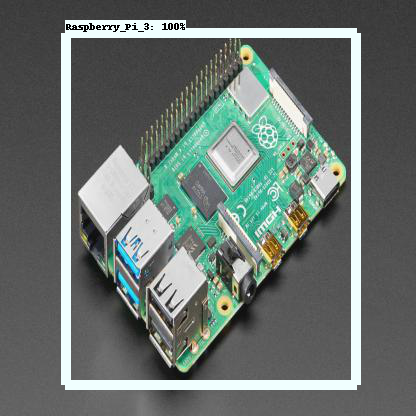

In [34]:
with detection_graph.as_default():
  with tf.compat.v1.Session(graph=detection_graph) as sess:
    # for image_path in ["/home/haresrv/Downloads/7th Sem/Project/Sample-images/ard/ArduinoNanoFront_3_lg.jpg"]:
    for image_path in ['/home/saiphani724/SmartLabBot/ComponentDetection/RaspberryPi/data/dataset/test/2.jpg']:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=10)
      
      white_bg_img = 255*np.ones(image_np.shape, np.uint8)
      
 
      (frame_height, frame_width) = image_np.shape[:2]
      count = 0
      for i in range(len(np.squeeze(scores))): 
        if(np.squeeze(scores)[i]>0.8):
            ymin = int((np.squeeze(boxes)[i][0]*frame_height))
            xmin = int((np.squeeze(boxes)[i][1]*frame_width))
            ymax = int((np.squeeze(boxes)[i][2]*frame_height))
            xmax = int((np.squeeze(boxes)[i][3]*frame_width))
            print(ymin, xmin, ymax, xmax)
            cropped_img = image_np[ymin:ymax,xmin:xmax]
            path = '/home/saiphani724/SmartLabBot/box_{}.jpg'.format(str(i))
            cv2.imwrite(path,cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))  
            print(path)
          
display(Image.fromarray(image_np))

''

# The below code is executing YOLO code. Change path of weights and model and input image is box_0.jpg from previous cell

In [26]:
!cd ../../../zigzag && pwd

/home/saiphani724/SmartLabBot/zigzag


In [35]:
# !python "/home/haresrv/Downloads/Project/Microcontroller Detection/ZigZag/detect.py" --weights "/home/hqaresrv/Downloads/Project/Microcontroller Detection/ZigZag/checkpoints/yolov4-tiny-416" --size 416 --model yolov4   --image "/home/haresrv/Downloads/images/ard/320-362_ALT_1.jpg"
!cd ../../../ComponentDetection/RaspberryPi && python "/home/saiphani724/SmartLabBot/ComponentDetection/RaspberryPi/detect.py" --weights "/home/saiphani724/SmartLabBot/ComponentDetection/RaspberryPi/checkpoints/yolov4-tiny-416" --size 416 --model yolov4   --image "/home/saiphani724/SmartLabBot/box_0.jpg"

2021-01-16 20:39:04.162489: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-01-16 20:39:04.162523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-01-16 20:39:05.160157: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-16 20:39:05.160183: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-16 20:39:05.160198: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (psp-linux): /proc/driver/nvidia/version does not exist
2021-01-16 20:39:05.175368: I tensorflow/core/platform/cpu_feature_

# Result will be stored in result.png in same folder as ipynb file

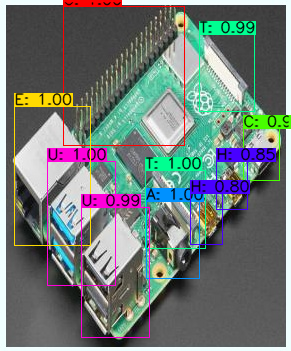

In [36]:
image = Image.open("/home/saiphani724/SmartLabBot/ComponentDetection/RaspberryPi/result.png")
image_np = load_image_into_numpy_array(image)
display(Image.fromarray(image_np))